<a href="https://colab.research.google.com/github/senorred/IDS-Data-Challenges/blob/master/Norred_Liz_CreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Card User Segmentation
## Liz Norred, 3/2/20

Summary: A senior VP is leading an effort to reduce costs associated with signup incentives by offering credit cards with carefully targeted benefits that will attract new cardholders. As a first step, she would like you to examine cardholder data collected over the last 6 months in order to understand the various kinds of users who use the company’s products. She is especially interested in getting an idea of which benefits to associate with each new card offering.

Approach: This is a user segementation problem, and will benefit from general EDA, correlation analysis, and cluster analysis. 

In [29]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


## Import Libraries and EDA

In [0]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns

In [31]:
df = pd.read_csv('/gdrive/My Drive/Insight Data Science/Data Challenges/cc_info.csv', header = 0, index_col=0, )
print(df.shape)
ProfileReport(df)

(8950, 17)


/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


## Why not just try clustering and see what pops out?

First I mean-imputed the NA values. Then I used k-means clustering to cluster the data into segments. I tried 2,3,and 4 clusters. Using 2 clusters seemed to divide the data along a halfway mark, using the frequency data. 3 clusters showed good separation in the credit limit, balance_freq, purchases_freq, balance, and prc_fullpayment categories. I decided to exclude both installments categories since they were highly correlated with purchases information, and because it is potentially mutually exclusive with one-off payments.

In [32]:
df.drop(columns=['INSTALLMENTS_PURCHASES','PURCHASES_INSTALLMENTS_FREQUENCY'])
df.shape

(8950, 17)

In [0]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X= imp_mean.fit_transform(df)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

df = pd.DataFrame(X, columns=df.columns)

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

df['labels']= kmeans.labels_
kmeans.cluster_centers_

array([[8.55769475e+02, 8.54414576e-01, 6.05531922e+02, 3.13659959e+02,
        2.92170383e+02, 4.95105621e+02, 4.67963752e-01, 1.54297093e-01,
        3.52621567e-01, 1.06773224e-01, 2.25298622e+00, 1.06888208e+01,
        2.75077612e+03, 9.98866277e+02, 5.85602363e+02, 1.56964173e-01,
        1.14336907e+01],
       [3.40057598e+03, 9.40609772e-01, 1.58230366e+03, 9.88859314e+02,
        5.93757125e+02, 2.11788076e+03, 5.39511439e-01, 3.17349631e-01,
        3.84691762e-01, 2.10875737e-01, 5.75054609e+00, 2.21266929e+01,
        9.01254021e+03, 2.89153825e+03, 1.56551247e+03, 1.34183296e-01,
        1.17374399e+01],
       [4.80882923e+03, 9.09847656e-01, 1.07073796e+04, 7.56195397e+03,
        3.14559359e+03, 5.19105119e+03, 7.47270397e-01, 5.95595015e-01,
        5.99510939e-01, 2.26083061e-01, 9.17557252e+00, 8.55496183e+01,
        1.24660305e+04, 1.80939666e+04, 2.49776397e+03, 3.33011382e-01,
        1.18396947e+01]])

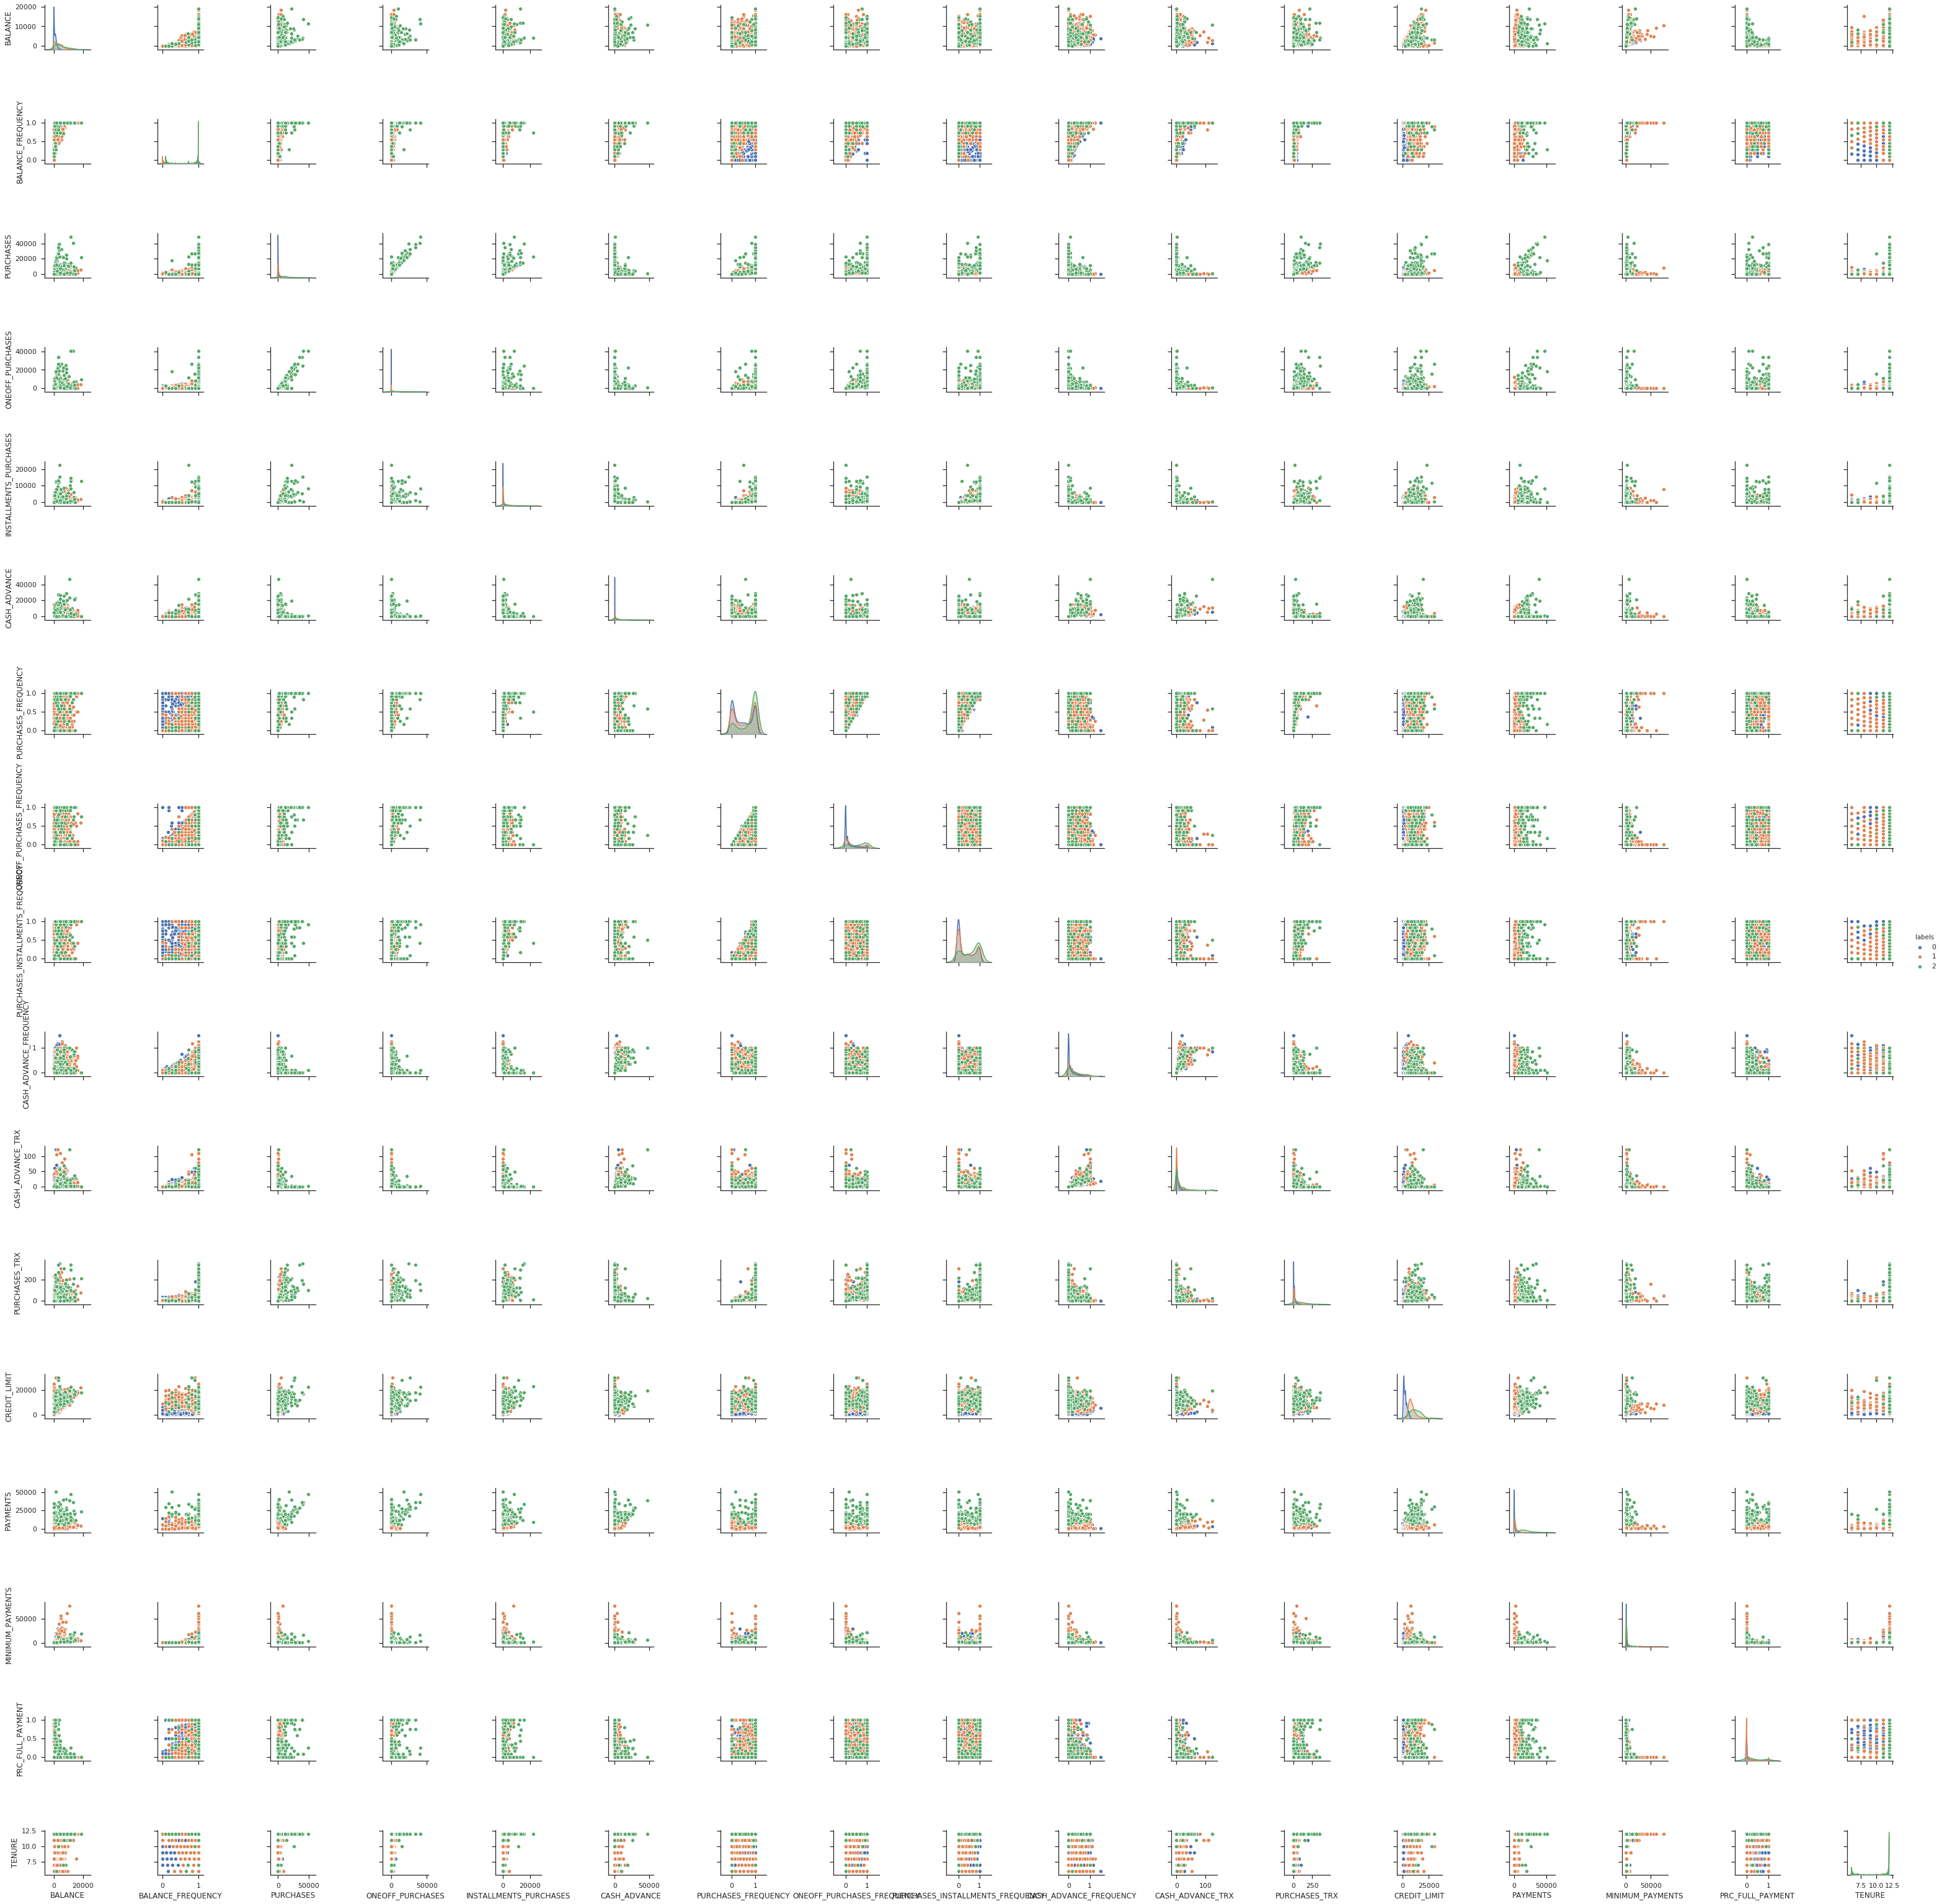

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
sns.pairplot(df, hue="labels")
plt.show()

##Graphs decribing big differences between the segments

##Graphs describing the segments themselves
First let's make the dataframes for the data...

In [0]:
user0= df[df['labels']==0]
user1= df[df['labels']==1]
user2= df[df['labels']==2]

###User 0 EDA (Bill Payers -- Basic)

There are 6528 users in this group. This user has a high proportion of low balances. Median balance is 535 USD, with an average of 855 USD. Maximum balance is 4931 USD. This user consistently has a balance in their account with a mean Balance frequency of 0.85, and a median value of 1. 65% of these users had a balance every month of the last year. However, yearly purchases in this group were comparatively low, with 23.2% making no purchases. The median yearly purchase sum was 290 USD and the average 604 USD. This group spent a total of 3948200 USD. 

53% of these users did not make any one-off purchases, and 44% of these users did not make any installments purchases (So what kind of purchases did they make? Are installments and one-offs anticorrelated?) 55.7% of these users did not request cash advance. Purchases_Frequency is roughly bimodal. 23% have no purchases and 21% have purchases every month. One-off purchases are more likely to have a zero frequency (53%) and installment purchases have a more bimodal distribution (44% zero and 13.5% every month). 

12% of these users requested a cash advance in one month, in values < 123 USD. Average purchases tend to be small for this group, with a median of 6 and a max of 232. Credit limit for this group tends to be lower overall, with a mean of 2500 and median of 2750, and mode of 3000. Total payments have a median of 602, and average of 997 (higher than total balances). Only 3.2% of these users did not pay at all. Total payments in this period were 6513700. Mean minimum payment was 585 and a median of 252, with the majority under 2500. 65% of these users did not pay a full amount in any month, and only 5% paid a full amount in every month. Mean frequency was 0.15. Tenure mean is 11.4, with 82% of users existing a year (or more?)

In [38]:
ProfileReport(user0)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


###User 1 EDA (Sometimes Spenders -- Gold Club)

There are 2291 users in this group. This user has a decreasing low-to-high distribution of balances. Median balance is 3019 USD, with an average of 3399 USD. Maximum balance is 18496 USD. This user consistently has a balance in their account with a mean Balance frequency of 0.94, and a median value of 1. 81% of these users had a balance every month of the last year. However, yearly purchases in this group were higher than user 0, with 22.6% making no purchases. The median yearly purchase sum was 790 USD and the average 1583 USD. This group spent a total of 3627800 USD. 

34% of these users did not make any one-off purchases, and 43% of these users did not make any installments purchases. 40.6% of these users did not request cash advance, but the cash advances requested were much higher with a mean of 798 USD. Purchases_Frequency is roughly bimodal. 22.6% have no purchases and 30% have purchases every month (more purchases evvery month than user 0). One-off purchases are less likely to have a zero frequency (34%), with 10% making one-off purchases every month. And installment purchases have a more bimodal distribution (43% zero and 17.5% every month). Generally these numbers indicate this user makes more purchases overall, more frequently, and they tend to be more one-offs than user 0. 

10% of these users requested a cash advance in one month, in values < 123 USD. Average purchases tend to be higher than user 0 for this group, with a median of 11 and a max of 309. Credit limit for this group tends to be higher overall, with a mean of 9008 and median of 8500, and mode of 7500. Total payments have a median of 1962, and average of 2892 (lower than total balances). Only 1.4% of these users did not pay at all. Total payments in this period were 6627600. Mean minimum payment was 1564 and a median of 872, with the majority under 5000. 70.8% of these users did not pay a full amount in any month, and only 5.4% paid a full amount in every month. Mean frequency was 0.13. Tenure mean is 11.7, with 90.3% of users existing a year (or more?)

In [39]:
ProfileReport(user1)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


###User 2 EDA (High Rollers-- Premium Candidates)

There are 131 users in this group. This user has a decreasing low-to-high distribution of balances. Median balance is 3452 USD, with an average of 4808 USD. Maximum balance is 19043 USD. This user consistently has a balance in their account with a mean Balance frequency of 0.90, and a median value of 1. 77% of these users had a balance every month of the last year. However, yearly purchases in this group were much higher than user 1 and user 0, with 11.5% making no purchases. The median yearly purchase sum was 10200 USD and the average 10707 USD. This group spent a total of 1402700 USD.

22% of these users did not make any installments purchases. 47.3% of these users did not request cash advance, but the cash advances requested were much higher than other users with a mean of 5191 USD. Purchases_Frequency is higher for 1.0 values, with a much smaller peak at 0. 11.5% have no purchases and 57.3% have purchases every month (more purchases every month than user 0 and user 1). One-off purchases are less likely to have a zero frequency (19.1%), with 32.8% making one-off purchases every month. And installment purchases have a weakly bimodal distribution, with a peak forming between the two (22.1% zero and 36.6% every month). Generally these numbers indicate this user makes more purchases overall, more frequently, and they tend to be more one-offs and installments than user 0 or user 1.

47.3% of these users did not request a cash advance. 11.5% of these users requested a cash advance in one month, in values < 123 USD. Average purchases tend to be higher than user 0 or user 1 for this group, with a median of 68 and a max of 358. Credit limit for this group tends to be very high, with a mean of 12466 and median of 12000, and mode of 9000. Total payments have a median of 16005, and average of 18094 (higher than total balances). All of these users made some payment toward their balance. Total payments in this period were 2370300. Mean minimum payment was 2497 and a median of 1149, with the majority under 5000. 32.1% of these users did not pay a full amount in any month, and 13.0% paid a full amount in every month. Mean frequency was 0.33. Tenure mean is 11.84, with 94.7% of users existing a year (or more?)

In [40]:
ProfileReport(user2)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)
